# SI 618 Final Project
### By: Marilu Duque

In [662]:
MY_UNIQNAME = 'marilud'

#### Importing Tools and Libraries

In [663]:
# Imports - Extra ones just in case
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import itertools
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn import metrics
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.patches as mpatches
from functools import reduce
import codecs
import glob
import os
import re
from gensim.models import Word2Vec
import sklearn.manifold
from textblob import TextBlob

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
%matplotlib inline

#### Loading All 7 Harry Potter Books (.Txt Format)

In [664]:
# Load Book 1 - The Philosophers Stone
HP_Book_1 = open('data/Book 1 - The Philosophers Stone.txt', 'r')
HP_Book_1 = HP_Book_1.read().replace('\n','')

# Load Book 2 - The Chamber of Secrets
HP_Book_2 = open('data/Book 2 - The Chamber of Secrets.txt', 'r')
HP_Book_2 = HP_Book_2.read().replace('\n','')

# Load Book 3 - The Prisoner of Azkaban
HP_Book_3 = open('data/Book 3 - The Prisoner of Azkaban.txt', 'r')
HP_Book_3 = HP_Book_3.read().replace('\n','')

# Load Book 4 - The Goblet of Fire
HP_Book_4 = open('data/Book 4 - The Goblet of Fire.txt', 'r')
HP_Book_4 = HP_Book_4.read().replace('\n','')

# Load Book 5 - The Order of the Phoenix
HP_Book_5 = open('data/Book 5 - The Order of the Phoenix.txt', 'r')
HP_Book_5 = HP_Book_5.read().replace('\n','')

# Load Book 6 - The Half Blood Prince
HP_Book_6 = open('data/Book 6 - The Half Blood Prince.txt', 'r')
HP_Book_6 = HP_Book_6.read().replace('\n','')

# Load Book 7 - The Deathly Hallows
HP_Book_7 = open('data/Book 7 - The Deathly Hallows.txt', 'r')
HP_Book_7 = HP_Book_7.read().replace('\n','')

# Books in List
books = list([HP_Book_1, HP_Book_2, HP_Book_3, HP_Book_4, HP_Book_5, HP_Book_6, HP_Book_7])

#HP_Book_2 = open_hp.read().replace('[<>.-^*{},:;=$&+?@#|()%!]\n','')

# Q1: How do the characteristics (i.e. Word count, popular adjectives & popular characters) of the 7 Harry Potter books compared to each other?

#### Getting To Know The Books

In [665]:
# Total Word Count
count_1 = len(HP_Book_1)
count_2 = len(HP_Book_2)
count_3 = len(HP_Book_3)
count_4 = len(HP_Book_4)
count_5 = len(HP_Book_5)
count_6 = len(HP_Book_6)
count_7 = len(HP_Book_7)
total_count = [['Philosophers Stone', count_1], ['Chamber of Secrets', count_2], ['Prisoner of Azkaban', count_3],
                ['Goblet of Fire', count_4],['Order of the Phoenix', count_5],['Half Blood Prince', count_6],
               ['Deathly Hallows', count_7]]
total_count =pd.DataFrame(total_count, columns=['BookTitle', 'Total']).sort_values("Total", axis = 0, ascending = False)
total_count.rename(index={0:'Philosophers Stone',1:'Chamber of Secrets',2:'Prisoner of Azkaban',3:'Goblet of Fire',4:'Order of the Phoenix',5:'Half Blood Prince',6:'Deathly Hallows'}, inplace=True)
#del total_count['BookTitle']
total_count

,BookTitle,Total
Order of the Phoenix,Order of the Phoenix,1559298
Deathly Hallows,Deathly Hallows,1188915
Goblet of Fire,Goblet of Fire,1149706
Half Blood Prince,Half Blood Prince,1026630
Prisoner of Azkaban,Prisoner of Azkaban,655473
Chamber of Secrets,Chamber of Secrets,514948
Philosophers Stone,Philosophers Stone,459169


In [666]:
# Total Word Count
Total_WC = total_count['Total'].sum()
print("The total word count for the entire series is:",Total_WC)

The total word count for the entire series is: 6554139


In [667]:
# Unique Words Per Book

len(set(HP_Book_1.split()))

Uniq_1 = len(set(HP_Book_1.split()))
Uniq_2 = len(set(HP_Book_2.split()))
Uniq_3 = len(set(HP_Book_3.split()))
Uniq_4 = len(set(HP_Book_4.split()))
Uniq_5 = len(set(HP_Book_5.split()))
Uniq_6 = len(set(HP_Book_6.split()))
Uniq_7 = len(set(HP_Book_7.split()))
Uniq_count = [['Philosophers Stone', Uniq_1], ['Chamber of Secrets', Uniq_2], ['Prisoner of Azkaban', Uniq_3],
                ['Goblet of Fire', Uniq_4],['Order of the Phoenix', Uniq_5],['Half Blood Prince', Uniq_6],
              ['Deathly Hallows', Uniq_7]]
Uniq_total_count =pd.DataFrame(Uniq_count, columns=['BookTitle', 'Total']).sort_values("Total", axis = 0, ascending = False)
Uniq_total_count.rename(index={0:'Philosophers Stone',1:'Chamber of Secrets',2:'Prisoner of Azkaban',3:'Goblet of Fire',4:'Order of the Phoenix',5:'Half Blood Prince',6:'Deathly Hallows'}, inplace=True)
#del Uniq_total_count['BookTitle']
Uniq_total_count

,BookTitle,Total
Order of the Phoenix,Order of the Phoenix,27438
Deathly Hallows,Deathly Hallows,23899
Goblet of Fire,Goblet of Fire,22010
Half Blood Prince,Half Blood Prince,21316
Prisoner of Azkaban,Prisoner of Azkaban,15489
Chamber of Secrets,Chamber of Secrets,13652
Philosophers Stone,Philosophers Stone,11982


In [668]:
# Total Unique Word count
Total_UC = Uniq_total_count['Total'].sum()
print("The total unique word count for the entire series is:",Total_UC)

The total unique word count for the entire series is: 135786


In [669]:
# Merge Dataframes
df_total = [total_count,Uniq_total_count]
df_total_f = reduce(lambda left,right: pd.merge(left,right,on='BookTitle'), df_total)

# Adjust Frame
df_total_f.rename(index={0:'Order of the Phoenix',1:'Deathly Hallows',2:'Goblet of Fire',3:'Half Blood Prince',4:'Prisoner of Azkaban',5:'Chamber of Secrets',6:'Philosophers Stone'}, inplace=True)
d1 = {'Total_x': ['Total Word Count'],'Total_y': ['Total Unique Count']}
df_total_f = df_total_f.rename(columns=lambda c: d1[c].pop(0) if c in d1.keys() else c)
df_total_f

,BookTitle,Total Word Count,Total Unique Count
Order of the Phoenix,Order of the Phoenix,1559298,27438
Deathly Hallows,Deathly Hallows,1188915,23899
Goblet of Fire,Goblet of Fire,1149706,22010
Half Blood Prince,Half Blood Prince,1026630,21316
Prisoner of Azkaban,Prisoner of Azkaban,655473,15489
Chamber of Secrets,Chamber of Secrets,514948,13652
Philosophers Stone,Philosophers Stone,459169,11982


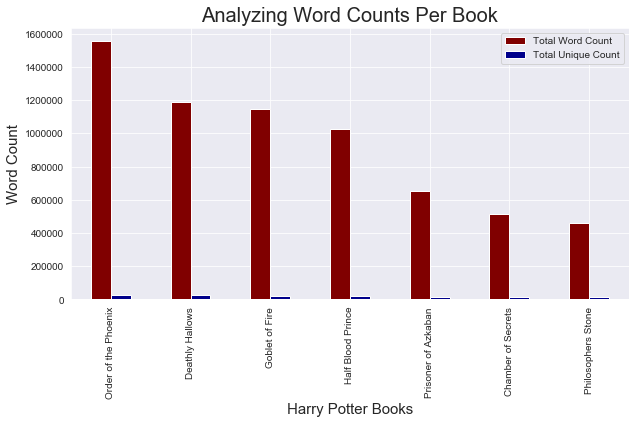

In [687]:
import matplotlib
# Set Theme Colors
norm = matplotlib.colors.Normalize(-1,1)
colors = [[norm(-1.0), "maroon"],
          [norm(-0.6), "darkgreen"],
          [norm( 0.6), "gold"],
          [norm( 1.0), "darkblue"]]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
#cmap="RdGy"

# Plot Total Word Count
df_total_f.plot(kind = 'bar',cmap=cmap, linewidth=1,figsize = (10,5))

# Labels
plt.title('Analyzing Word Counts Per Book',fontsize=20)
plt.ylabel('Word Count',fontsize=15)
plt.xlabel('Harry Potter Books',fontsize=15)
plt.savefig('hpwordcount.png')

In [672]:
# Average word count
print(df_total_f.mean(axis=0))

# Describe word count set
df_total_f.describe()

Total Word Count      936305.571429
Total Unique Count     19398.000000
dtype: float64


,Total Word Count,Total Unique Count
count,7.000000e+00,7.000000
mean,9.363056e+05,19398.000000
std,4.061399e+05,5754.646268
min,4.591690e+05,11982.000000
25%,5.852105e+05,14570.500000
50%,1.026630e+06,21316.000000
75%,1.169310e+06,22954.500000
max,1.559298e+06,27438.000000


In [673]:
# Min and Max of each column
print("The Min for Total Word Count is:",df_total_f['Total Word Count'].min())
print("The Max for Total Word Count is:",df_total_f['Total Word Count'].max())

print("The Min for Total Unique Count is:",df_total_f['Total Unique Count'].min())
print("The Max for Total Unique Count is:",df_total_f['Total Unique Count'].max())

The Min for Total Word Count is: 459169
The Max for Total Word Count is: 1559298
The Min for Total Unique Count is: 11982
The Max for Total Unique Count is: 27438


In [674]:
# Open full text book
full_book = open('fullbook/books_together.txt', 'r')
full_book = full_book.read().replace('\n','')
# Apply Text Blob library/tool for pop words
all_words= TextBlob(full_book)
word_tag =all_words.tags
word_tag_df = pd.DataFrame(word_tag)

In [675]:
# Name columns
word_tag_df.columns = ['Words', "Type"]
word_tag_df

# New column for later
name_tag_df = word_tag_df.copy()
adj_tag_df = word_tag_df.copy()

In [676]:
# Top 10 Adjectives
#adj_tag_df.columns = ['Words', "Adj"]
adj_tag_df = adj_tag_df.drop(adj_tag_df.index[adj_tag_df.Type != 'JJ'])
adj_tag_df = pd.DataFrame(adj_tag_df['Words'].value_counts().nlargest(20))
# Drop undescriptive words/symbols
adj_tag_df = adj_tag_df.drop([adj_tag_df.index[1]])
adj_tag_df = adj_tag_df.drop([adj_tag_df.index[1]])
adj_tag_df = adj_tag_df.drop([adj_tag_df.index[1]])
adj_tag_df = adj_tag_df.drop([adj_tag_df.index[0]])
adj_tag_df = adj_tag_df.drop([adj_tag_df.index[0]])
adj_tag_df = adj_tag_df.drop([adj_tag_df.index[1]])
adj_tag_df = adj_tag_df.drop([adj_tag_df.index[2]])
adj_tag_df = adj_tag_df.drop([adj_tag_df.index[4]])
adj_tag_df = adj_tag_df.drop([adj_tag_df.index[7]])
adj_tag_df = adj_tag_df.drop([adj_tag_df.index[9]])
adj_tag_df

,Words
other,1133
last,1021
little,929
good,756
first,721
few,686
old,682
long,663
large,640
own,621


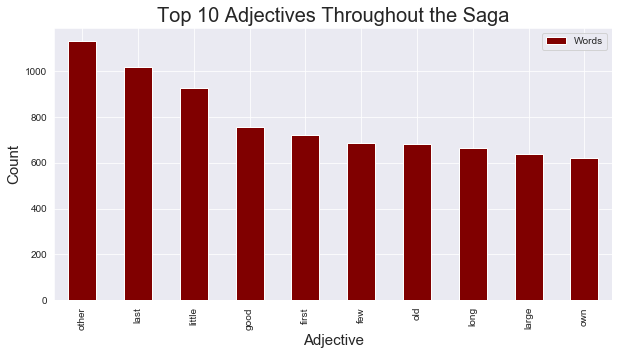

In [688]:
# Plot 10 Adjectives
adj_tag_df.plot(kind='bar',cmap=cmap, linewidth=1,figsize = (10,5))

# Labels
plt.title('Top 10 Adjectives Throughout the Saga',fontsize=20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Adjective',fontsize=15)
plt.savefig('popHPadj.png')

In [678]:
# Looking for top 10 popular characters - Cleaning data
#name_tag_df.columns = ['Words', "Nouns"]
name_tag_df = name_tag_df.drop(name_tag_df.index[name_tag_df.Type != 'NNP'])
name_tag_df = name_tag_df.drop(name_tag_df.index[name_tag_df.Type == "J.K."])
name_tag_df = name_tag_df.drop(name_tag_df.index[name_tag_df.Type == "Rowling"])
name_tag_df = name_tag_df.drop(name_tag_df.index[name_tag_df.Type == "Mr."])
name_tag_df

,Words,Type
1,THE,NNP
2,BOY,NNP
3,WHO,NNP
4,LIVED,NNP
5,Mr.,NNP
...,...,...
1290056,Harry,NNP
1290057,Potter,NNP
1290060,Deathly,NNP
1290061,Hallows,NNP


In [679]:
# Moved to new dataframe and cleaning
top_charac = pd.DataFrame(name_tag_df['Words'].value_counts().nlargest(23))
# Drop non-relevant pro nouns like professor, Mr., last names, locations, etc.
top_charac = top_charac.drop([top_charac.index[1]])
top_charac = top_charac.drop([top_charac.index[1]])
top_charac = top_charac.drop([top_charac.index[1]])
top_charac = top_charac.drop([top_charac.index[2]])
top_charac = top_charac.drop([top_charac.index[3]])
top_charac = top_charac.drop([top_charac.index[3]])
top_charac = top_charac.drop([top_charac.index[3]])
top_charac = top_charac.drop([top_charac.index[4]])
top_charac = top_charac.drop([top_charac.index[5]])
top_charac = top_charac.drop([top_charac.index[6]])
top_charac = top_charac.drop([top_charac.index[8]])
top_charac = top_charac.drop([top_charac.index[8]])
top_charac = top_charac.drop([top_charac.index[9]])
#top_charac = top_charac.drop([top_charac.index[9]])
#top_charac = top_charac.drop([top_charac.index[9]])
top_charac

,Words
Harry,21770
Ron,6283
Hermione,4997
Dumbledore,3107
Hagrid,2013
Snape,1654
Malfoy,1318
Voldemort,1199
Sirius,1104
Fred,894


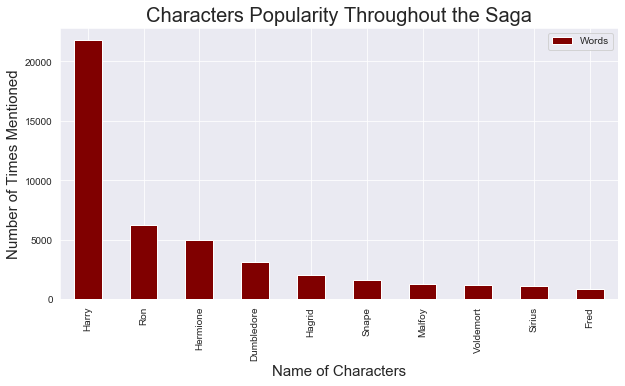

In [689]:
# Plot 
top_charac.plot(kind='bar',cmap=cmap, linewidth=1,figsize = (10,5))

# Labels
plt.title('Characters Popularity Throughout the Saga',fontsize=20)
plt.ylabel('Number of Times Mentioned',fontsize=15)
plt.xlabel('Name of Characters',fontsize=15)
plt.savefig('popHPchar.png')

#### Q1 Interpritation ####
From the total and unique word count, we can see that the overall word count per book, greatly outweighs the unique word count. The total word count for the entire series is 6,554,139 while the total unique word count is 135,786. From this, we can assume that a vast majority of words are filler or stop words used to keep sentence cohesiveness. In merging both the total and unique word counts, we can analyze the average word counts across the series. The average Total word count is 936,305 while the total unique is 19,398. The longest book was the 5th book, Order of the Phoenix (2003), the shortest was the 1st book, Philosopher's Stone (1997). The first book being the shortest makes sense because J.K. Rowling was just getting the story of Harry Potter started and almost testing the market. Since then, J.K. Rowling had been publishing a Harry Potter book every year since 1997 so it makes sense that Order of the Phoenix was the longest as she spent 3 years writing and publishing it.

Additionally, I calculated the top 10 most popular adjectives which were 'other', 'last', 'little', 'good', 'first', 'few', 'old', 'long', 'large', 'own'. I was surprised at how basic these adjectives were with the dark content in the book. I expected words like 'insane', 'terrible','black' or 'dead'.

As for the most popular characters throughout the series, obviously, Harry Potter would be the most popular. Continuing the next 2 were his best friends, Ron and Hermione. Then his mentors Dumbledore and Hagrid, then his nemesis Snape, Malfoy, Voldemort, and secondary characters Sirius and Fred.

# Q2: How have the Hogwarts houses (Gryffindor, Slytherin, Ravenclaw and Hufflepuff) popularities changed throughout the 7 books?

In [680]:
# Book 1 - The Philosophers Stone
gryf1 = HP_Book_1.count("Gryffindor")
sly1 = HP_Book_1.count("Slytherin")
rave1 = HP_Book_1.count("Ravenclaw")
huff1 = HP_Book_1.count("Hufflepuff")
houses_book1 = [['Gryffindor', gryf1], ['Slytherin', sly1], ['Ravenclaw', rave1],['Hufflepuff', huff1]]
df_houses_book1 =pd.DataFrame(houses_book1, columns=['House', 'Mentions']).sort_values("Mentions", axis = 0, ascending = False)
df_houses_book1

,House,Mentions
0,Gryffindor,97
1,Slytherin,63
3,Hufflepuff,19
2,Ravenclaw,11


In [681]:
# Book 2 - The Chamber of Secrets
gryf2 = HP_Book_2.count("Gryffindor")
sly2 = HP_Book_2.count("Slytherin")
rave2 = HP_Book_2.count("Ravenclaw")
huff2 = HP_Book_2.count("Hufflepuff")
houses_book2 = [['Gryffindor', gryf2], ['Slytherin', sly2], ['Ravenclaw', rave2],['Hufflepuff', huff2]]
df_houses_book2 =pd.DataFrame(houses_book2, columns=['House', 'Mentions']).sort_values("Mentions", axis = 0, ascending = False)
df_houses_book2

,House,Mentions
1,Slytherin,120
0,Gryffindor,95
3,Hufflepuff,19
2,Ravenclaw,10


In [682]:
# Book 3 - The Prisoner of Azkaban
gryf3 = HP_Book_3.count("Gryffindor")
sly3 = HP_Book_3.count("Slytherin")
rave3 = HP_Book_3.count("Ravenclaw")
huff3 = HP_Book_3.count("Hufflepuff")
houses_book3 = [['Gryffindor', gryf3], ['Slytherin', sly3], ['Ravenclaw', rave3],['Hufflepuff', huff3]]
df_houses_book3 =pd.DataFrame(houses_book3, columns=['House', 'Mentions']).sort_values("Mentions", axis = 0, ascending = False)
df_houses_book3

,House,Mentions
0,Gryffindor,129
1,Slytherin,68
2,Ravenclaw,31
3,Hufflepuff,16


In [683]:
# Book 4 - The Goblet of Fire
gryf4 = HP_Book_4.count("Gryffindor")
sly4 = HP_Book_4.count("Slytherin")
rave4 = HP_Book_4.count("Ravenclaw")
huff4 = HP_Book_4.count("Hufflepuff")
houses_book4 = [['Gryffindor', gryf4], ['Slytherin', sly4], ['Ravenclaw', rave4],['Hufflepuff', huff4]]
df_houses_book4 =pd.DataFrame(houses_book4, columns=['House', 'Mentions']).sort_values("Mentions", axis = 0, ascending = False)
df_houses_book4

,House,Mentions
0,Gryffindor,85
1,Slytherin,49
3,Hufflepuff,34
2,Ravenclaw,21


In [684]:
# Book 5 - The Order of the Phoenix
gryf5 = HP_Book_5.count("Gryffindor")
sly5 = HP_Book_5.count("Slytherin")
rave5 = HP_Book_5.count("Ravenclaw")
huff5 = HP_Book_5.count("Hufflepuff")
houses_book5 = [['Gryffindor', gryf5], ['Slytherin', sly5], ['Ravenclaw', rave5],['Hufflepuff', huff5]]
df_houses_book5 =pd.DataFrame(houses_book5, columns=['House', 'Mentions']).sort_values("Mentions", axis = 0, ascending = False)
df_houses_book5

,House,Mentions
0,Gryffindor,127
1,Slytherin,81
2,Ravenclaw,33
3,Hufflepuff,26


In [685]:
#Book 6 - The Half Blood Prince
gryf6 = HP_Book_6.count("Gryffindor")
sly6 = HP_Book_6.count("Slytherin")
rave6 = HP_Book_6.count("Ravenclaw")
huff6 = HP_Book_6.count("Hufflepuff")
houses_book6 = [['Gryffindor', gryf6], ['Slytherin', sly6], ['Ravenclaw', rave6],['Hufflepuff', huff6]]
df_houses_book6 =pd.DataFrame(houses_book6, columns=['House', 'Mentions']).sort_values("Mentions", axis = 0, ascending = False)
df_houses_book6

,House,Mentions
0,Gryffindor,72
1,Slytherin,57
3,Hufflepuff,23
2,Ravenclaw,19


In [691]:
# Book 7 - The Deathly Hallows
gryf7 = HP_Book_7.count("Gryffindor")
sly7 = HP_Book_7.count("Slytherin")
rave7 = HP_Book_7.count("Ravenclaw")
huff7 = HP_Book_7.count("Hufflepuff")
houses_book7 = [['Gryffindor', gryf7], ['Slytherin', sly7], ['Ravenclaw', rave7],['Hufflepuff', huff7]]
df_houses_book7 =pd.DataFrame(houses_book7, columns=['House', 'Mentions']).sort_values("Mentions", axis = 0, ascending = False)
df_houses_book7

,House,Mentions
0,Gryffindor,72
2,Ravenclaw,48
1,Slytherin,35
3,Hufflepuff,11


In [692]:
# Merge Dataframes
df1 = [df_houses_book1,df_houses_book2,df_houses_book3,df_houses_book4,df_houses_book5,df_houses_book6,df_houses_book7]
df_final = reduce(lambda left,right: pd.merge(left,right,on='House'), df1)
df_final.rename(index={0:'Gryffindor',1:'Slytherin',2:'Hufflepuff',3:'Ravenclaw'}, inplace=True)
df_final

,House,Mentions_x,Mentions_y,Mentions_x,Mentions_y,Mentions_x,Mentions_y,Mentions
Gryffindor,Gryffindor,97,95,129,85,127,72,72
Slytherin,Slytherin,63,120,68,49,81,57,35
Hufflepuff,Hufflepuff,19,19,16,34,26,23,11
Ravenclaw,Ravenclaw,11,10,31,21,33,19,48


In [693]:
# Rename Columns
d = {'Mentions_x': ['Book1', 'Book3', 'Book5'],'Mentions_y': ['Book2', 'Book4', 'Book6'],'Mentions': ['Book7']}
df_final = df_final.rename(columns=lambda c: d[c].pop(0) if c in d.keys() else c)
df_final

,House,Book1,Book2,Book3,Book4,Book5,Book6,Book7
Gryffindor,Gryffindor,97,95,129,85,127,72,72
Slytherin,Slytherin,63,120,68,49,81,57,35
Hufflepuff,Hufflepuff,19,19,16,34,26,23,11
Ravenclaw,Ravenclaw,11,10,31,21,33,19,48


In [694]:
df_final1 = df_final.transpose()
df_final1 = df_final1.drop(['House'])
df_final1

,Gryffindor,Slytherin,Hufflepuff,Ravenclaw
Book1,97,63,19,11
Book2,95,120,19,10
Book3,129,68,16,31
Book4,85,49,34,21
Book5,127,81,26,33
Book6,72,57,23,19
Book7,72,35,11,48


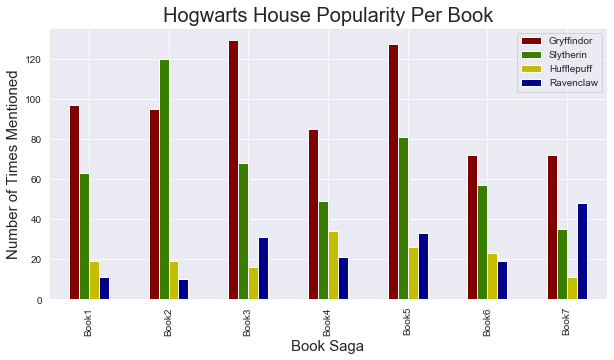

In [695]:
# Plot 
df_final1.plot(kind = 'bar',cmap=cmap, linewidth=1,figsize = (10,5))

# Labels
plt.title('Hogwarts House Popularity Per Book',fontsize=20)
plt.ylabel('Number of Times Mentioned',fontsize=15)
plt.xlabel('Book Saga',fontsize=15)
plt.savefig('popHPhouse.png')
leg = plt.legend()

# Legend
leg.get_texts()[0].set_text('Gryffindor')
leg.get_texts()[1].set_text('Slytherin')
leg.get_texts()[2].set_text('Hufflepuff')
leg.get_texts()[3].set_text('Ravenclaw')

In [696]:
# Find Total For Each House
df_final2 = df_final1.copy()
df_final2.loc['Total'] = df_final2.sum()
df_final2

,Gryffindor,Slytherin,Hufflepuff,Ravenclaw
Book1,97,63,19,11
Book2,95,120,19,10
Book3,129,68,16,31
Book4,85,49,34,21
Book5,127,81,26,33
Book6,72,57,23,19
Book7,72,35,11,48
Total,677,473,148,173


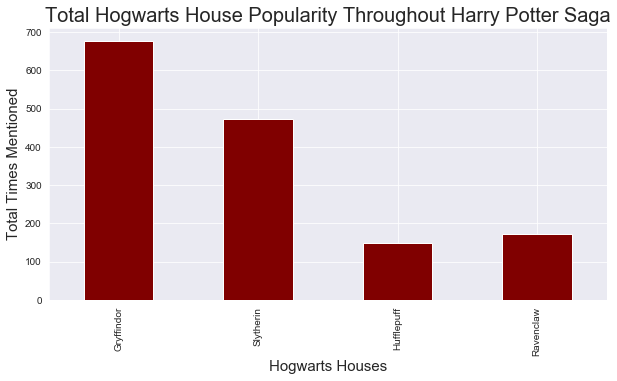

In [697]:
# Plot The Total
total2 = df_final2.iloc[7]
total2.plot(kind = 'bar', cmap=cmap, linewidth=1,figsize = (10,5))

# Labels
plt.title('Total Hogwarts House Popularity Throughout Harry Potter Saga',fontsize=20)
plt.ylabel('Total Times Mentioned',fontsize=15)
plt.xlabel('Hogwarts Houses',fontsize=15)
plt.savefig('popHPhousetotal.png')

In [698]:
# Correlation between Gryffindor and Slytherin
df_final2['Gryffindor'].astype('float64').corr(df_final2['Slytherin'].astype('float64'))

0.9869908502021708

In [699]:
# Correlation between Gryffindor and Ravenclaw
df_final2['Gryffindor'].astype('float64').corr(df_final2['Ravenclaw'].astype('float64'))

0.9681984973085955

In [651]:
# Correlation between Gryffindor and Hufflepuff
df_final2['Gryffindor'].astype('float64').corr(df_final2['Hufflepuff'].astype('float64'))

0.9835143910030247

#### Q2 Interpritation ####
After getting the count for each Hogwarts house mentioned, we can see with the bar plot that across all but one book, Gryffindor is the most popular with 677 mentions. This is not surprising as the 3 main characters are in Gryffindor. Leading behind them is Slytherin with 473 mentions which is not surprising as well since the book's antagonist, Voldemort, has a history in the Slytherin house. It was surprising that Slytherin was the most popular house in the 2nd book, Chamber of Secrets, since the main characters were still leading the story in this one. I believe it has to do with the fact that the story took place in mainly Slytherin dominated parts of Hogwarts such as the actual Chamber of Secrets. The 3rd most popular is Hufflepuff with 148 mentions and the 4th Ravenclaw with 173 mentions. These last two rankings are not surprising as they did not have a giant storyline in the books. 

Additionally, I found the correlation between the most popular house and the other three. Gryffindor and Slytherin had the strongest correlation with .986, then it was Gryffindor and Hufflepuff with a .983 correlation and lastly Gryffindor and Ravenclaw with a .968 correlation. The strongest correlation is expected as the houses are continued nemesis throughout the series. 

# Q3: How can we classify the sentiment of the Harry Potter books?

In [700]:
# Apply Text Blob from question 1

In [701]:
# Calculate sentiment polarity and subjectivity for entire series
print(all_words.sentiment)
print(all_words.polarity)

Sentiment(polarity=0.044786892023778016, subjectivity=0.483304617428642)
0.044786892023778016


In [702]:
# Calculate and show sentiment polarity and subjectivity
# Sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity)

sentiment=[]
for sentence in all_words.sentences:
    sentiment.append(sentence.sentiment)
    
# Add to dataframe    
df_sen_pol= pd.DataFrame(sentiment)
df_sen_pol.index.name = 'index'

In [711]:
# Look at data
df_sen_pol.head()

,polarity,subjectivity
index,,
0,0.403333,0.636667
1,-0.012500,0.429167
2,-0.200000,0.400000
3,0.046726,0.524702
4,-0.008571,0.257143


In [704]:
# Data described
df_sen_pol.describe()

,polarity,subjectivity
count,63914.000000,63914.000000
mean,0.027337,0.319369
std,0.250242,0.314868
min,-1.000000,0.000000
25%,-0.016667,0.000000
50%,0.000000,0.300000
75%,0.100000,0.535714
max,1.000000,1.000000


<Figure size 720x360 with 0 Axes>

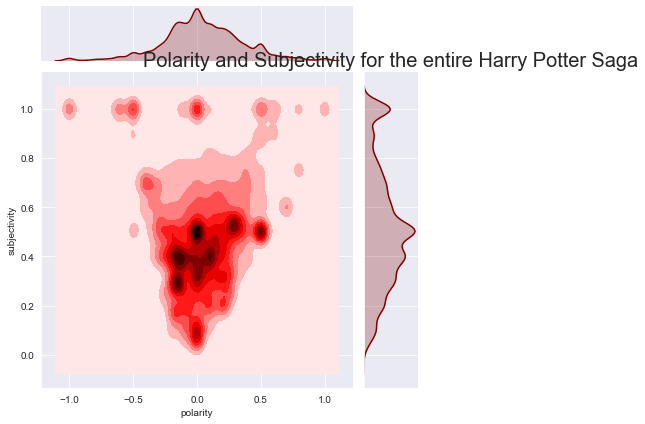

In [705]:
# Plot polarity and subjectivity for the entire series
plt.figure(figsize=(10, 5))
sns.jointplot("polarity", "subjectivity", data=df_sen_pol[(df_sen_pol.subjectivity != 0)], kind="kde", color='maroon')

# Labels
plt.title('Polarity and Subjectivity for the entire Harry Potter Saga',fontsize=20)
plt.savefig('polaritysub.png')

#### Q3 Interpritation ####

After running the entire series through TextBlob, we can get our sentiment analysis data. In doing so, it was able to analyze 63,914 sentences to achieve the current sentiment analysis. We can see that subjectivity, feelings expressed in the text, is .483 which means that it is slightly above neutral subjectivity due to its close nature to +1. The polarity, emotions in the text, is much more neutral at .044. The subjectivity is expected, but I thought the polarity might be a bit higher as the life and death nature of the books can stir up many emotions throughout its sentences. This should be understood though because the subjectivity and polarity are directly correlated. In looking at the joint plot, we can see the distribution in the sentiment analysis. Through the peaks in the graph, we can see that polarity is much more stable and neutral while subjectivity is more fluid. 

# Q4: How do Harry, Dubmbledore and Malfoy compare on a good vs evil scale?

In [706]:
# Word2Vec  

# Load books sorted to better process model training
load_books_sorted = sorted(glob.glob("data/*.txt"))
load_books_sorted

['data/Book 1 - The Philosophers Stone.txt',
 'data/Book 2 - The Chamber of Secrets.txt',
 'data/Book 3 - The Prisoner of Azkaban.txt',
 'data/Book 4 - The Goblet of Fire.txt',
 'data/Book 5 - The Order of the Phoenix.txt',
 'data/Book 6 - The Half Blood Prince.txt',
 'data/Book 7 - The Deathly Hallows.txt']

In [707]:
# Put all the books into one doc/variable.
space = ""
for book in load_books_sorted:
    with open(book) as complete:
        space+= str(complete.read())       

In [708]:
# Cleaning data with regular expressions
books = space.lower().strip()
    # Replaces where the string contains a white space character plus some more
books = re.sub('\s+',' ',books)
    # Replaces where the string contains digits
books = re.sub('\d',' ',books)
    # Replaces where digits are between 0 and 9 + additional occurances 
books = re.sub('\[[0-9]*\]',' ',books)
len(books)

6554138

In [709]:
# Tokenizing
import gensim

tok_books = sent_tokenize(books) 
words1 = [word_tokenize(line) for line in tok_books]
len(words1)
#words
# Kept getting errors for str callability

62829

In [710]:
# Delete Stop Words to better model and establish connections/relationships betwwen charachters
#reference
for line in range(len(words1)):
    words1[line] = [word for word in words1[line] if word not in stopwords.words('english')]

In [290]:
import gensim.models.word2vec as w2v

In [740]:
# Building and Training the Word2Vec model
import multiprocessing

# Build
num_features = 600
min_word_count = 1
num_workers = multiprocessing.cpu_count()
context_size = 7
downsampling = 1e-3
seed = 1

model = Word2Vec(words1, sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling)

In [741]:
# Train
model.train(words1, total_examples=model.corpus_count, epochs=model.iter)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


(3136294, 4538750)

In [742]:
# Save for later
model.save(os.path.join("data", "model.w2v"))

In [743]:
# Understanding the model

# Check for words
print('hogwarts' in model.wv.vocab) #Should be True
print('yuck' in model.wv.vocab) #Should be False

# All the known words into a list & finding Length
words = sorted(model.wv.vocab.keys())
print("Number of words:", len(words1))

# Print 10 words in the vocab from index 13550 to 13570
print(words1[13550:13560])

True
False
Number of words: 62829
[['hogsmeade', 'looked', 'like', 'christmas', 'card', ';', 'little', 'thatched', 'cottages', 'shops', 'covered', 'layer', 'crisp', 'snow', ';', 'holly', 'wreaths', 'page', '|', 'harry', 'potter', 'prisoner', 'azkaban', '-', 'j.k.', 'rowling', 'doors', 'strings', 'enchanted', 'candles', 'hanging', 'trees', '.'], ['harry', 'shivered', ';', 'unlike', 'two', ',', '’', 'cloak', '.'], ['headed', 'street', ',', 'heads', 'bowed', 'wind', ',', 'ron', 'hermione', 'shouting', 'scarves', '.'], ['“', '’', 'post', 'office', '—', '”', '“', 'zonko', '’', '—', '”', '“', 'could', 'go', 'shrieking', 'shack', '—', '”', '“', 'tell', ',', '”', 'said', 'ron', ',', 'teeth', 'chattering', ',', '“', 'shall', 'go', 'butterbeer', 'three', 'broomsticks', '?', '”', 'harry', 'willing', ';', 'wind', 'fierce', 'hands', 'freezing', ',', 'crossed', 'road', ',', 'minutes', 'entering', 'tiny', 'inn', '.'], ['extremely', 'crowded', ',', 'noisy', ',', 'warm', ',', 'smoky', '.'], ['curvy', '

In [744]:
# Testing accuracy

def get_unmatching_word(words1):
    for word in words1:
        if not word in model.wv.vocab:
            return None
    return model.wv.doesnt_match(words1)

# Testing who from the list is a villainous student 
print(get_unmatching_word(['harry', 'ron', 'malfoy','hermoine','luna'])) #Should be Malfoy
# Testing who from the list is not a student
print(get_unmatching_word(['harry', 'ron', 'malfoy','hermoine','hagrid'])) #Should be Hagrid
# Testing who from the list is not a slytherin student
print(get_unmatching_word(['ron', 'goyle', 'malfoy','crabbe','slytherin'])) #Should be Ron

malfoy
hagrid
ron


/opt/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [745]:
# Testing the vectors semantic relations for hagrid.
model.wv.most_similar('hagrid')

[('ronan', 0.6159861087799072),
 ('cabin', 0.597328782081604),
 ('grawp', 0.5782542824745178),
 ('yeh', 0.5765154361724854),
 ('norbert', 0.5708436965942383),
 ('fang', 0.5597238540649414),
 ('bane', 0.5476123094558716),
 ('ter', 0.5453526973724365),
 ('thestrals', 0.5438872575759888),
 ('righ', 0.5404348373413086)]

In [746]:
# Testing the vectors semantic relations with james potters relationship to snape.
model.wv.most_similar(positive=['james', 'father'], negative=['snape'], topn=6)

[('lily', 0.6597872972488403),
 ('mother', 0.6506403684616089),
 ('parents', 0.6388553380966187),
 ('inherited', 0.638725996017456),
 ('brother', 0.6387024521827698),
 ('peter', 0.6358973979949951)]

In [747]:
# Testing the vectors semantic relations with prof. mcgonagall.
model.wv.most_similar(positive=['mcgonagall', 'cat'], negative=['dog'], topn=6)

[('professor', 0.5678082704544067),
 ('norris', 0.5218874216079712),
 ('dramatically', 0.5192212462425232),
 ('sprout', 0.515556812286377),
 ('caretaker', 0.5036527514457703),
 ('stern', 0.4959017038345337)]

In [748]:
# Testing the vectors semantic relations with lily potters relationship to death.
model.wv.most_similar(positive=['lily', 'mother'], negative=['death'], topn=6)

[('father', 0.60727459192276),
 ('james', 0.5751984119415283),
 ('inherited', 0.5529425144195557),
 ('eyes.', 0.5495509505271912),
 ('mudblood', 0.5456504821777344),
 ('mistress', 0.5412906408309937)]

In [749]:
# Testing the vectors semantic relations for wizard
model.wv.most_similar("wizard", topn=6)

[('witch', 0.6808496713638306),
 ('wheezes', 0.6280815005302429),
 ('famous', 0.5739194750785828),
 ('tufty-haired', 0.5607561469078064),
 ('full-grown', 0.559131383895874),
 ('medieval', 0.5559149980545044)]

In [750]:
# Finding Word Vectors for Voldemort
model.wv['voldemort']

array([ 8.30400735e-02, -1.28038853e-01, -7.82160014e-02, -1.46560758e-01,
        4.03040022e-01, -1.72988310e-01,  5.44854477e-02,  1.57160014e-01,
        9.48568657e-02,  2.59839296e-01,  1.70863979e-02,  4.22543168e-01,
       -9.65579823e-02, -1.64198726e-01,  2.74597377e-01,  1.37540132e-01,
        1.08627856e-01, -1.85936525e-01, -3.94284837e-02, -6.45567775e-02,
        8.70702974e-03, -3.24904663e-03,  3.87136489e-01,  1.02510210e-02,
       -1.95763186e-01, -1.86658606e-01,  2.18629763e-01, -1.07914268e-03,
       -1.63472131e-01, -1.63881063e-01, -3.32353711e-02, -4.60848538e-03,
       -1.52025789e-01,  1.66489914e-01,  2.36531273e-02, -1.41138107e-01,
       -7.34752836e-03,  7.94795901e-02, -7.05076903e-02, -1.19300380e-01,
        1.50698200e-01,  8.81137773e-02, -1.94008708e-01, -4.61654887e-02,
        2.15380549e-01,  1.09213360e-01, -4.70859930e-02, -1.95792437e-01,
        1.18975416e-01,  7.74242207e-02,  1.04941733e-01,  2.93269575e-01,
        8.97681937e-02, -

In [751]:
# Finding Word Vectors for Harry
model.wv['harry']

array([-0.02255897, -0.0372196 ,  0.04132935,  0.06516945,  0.04688665,
        0.09630471, -0.01507643, -0.01218433,  0.12365136,  0.00955966,
        0.14165093,  0.11841764, -0.08078019, -0.20118491,  0.19080196,
        0.04427744,  0.03055297, -0.02239052, -0.1791045 , -0.15351653,
        0.00623586,  0.01524271,  0.00900875,  0.02389793,  0.01305003,
        0.09610917,  0.05298731,  0.00890154,  0.06495214, -0.05996985,
       -0.11288626,  0.00885349, -0.17216794,  0.02041974, -0.10047742,
        0.06142554, -0.15447994, -0.0662585 , -0.18680039, -0.02365565,
        0.03507103, -0.01750517,  0.12987968, -0.13562153, -0.06802187,
        0.11679129, -0.01240189,  0.00477818,  0.17017928, -0.01887769,
       -0.06035905,  0.07375477,  0.13901249, -0.02568234, -0.2075912 ,
       -0.09509725, -0.07798196,  0.04788035,  0.09882359,  0.0658235 ,
       -0.1332159 ,  0.05048052, -0.135244  ,  0.03725445, -0.03876777,
       -0.03075203, -0.00575551, -0.00283068, -0.00130144, -0.10

In [752]:
# Cosine similarity between voldemort and harry
model.wv.similarity('voldemort', 'harry')

#There is high similarity as the similarity value is positive in the 1 direction.

0.34184426

In [753]:
# Constructing interpretable semantic scales 
from scipy import spatial
 
def cosine_similarity(x, y):
    return(1 - spatial.distance.cosine(x, y))

pol_words_sim_2d = pd.DataFrame([[cosine_similarity(model.wv['harry'], model.wv['good']), cosine_similarity(model.wv['harry'], model.wv['bad'])],
                                 [cosine_similarity(model.wv['dumbledore'], model.wv['good']), cosine_similarity(model.wv['dumbledore'], model.wv['bad'])],
                                 [cosine_similarity(model.wv['malfoy'], model.wv['good']), cosine_similarity(model.wv['malfoy'], model.wv['bad'])]],
                                index=['harry', 'dumbledore', 'malfoy'], columns=['good', 'bad'])

In [754]:
pol_words_sim_2d

,good,bad
harry,0.313017,0.355965
dumbledore,0.241278,0.084277
malfoy,0.146232,0.251507


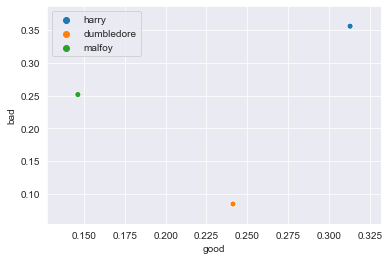

In [761]:
sns.scatterplot(x='good', y='bad', data=pol_words_sim_2d, hue=pol_words_sim_2d.index)
plt.savefig('goodbadscat.png')
#harry: both very bad and very good
#dumbledore: more good, less bad
#malfoy: more bad, less good

In [756]:
# Bad to good scale
scale_bad_good = model.wv['good'] - model.wv['bad']
cosine_similarity(model.wv['harry'], scale_bad_good)
cosine_similarity(model.wv['dumbledore'], model.wv['good'] - model.wv['bad'])
cosine_similarity(model.wv['malfoy'], model.wv['good'] - model.wv['bad'])

-0.07399161159992218

In [757]:
pol_words_sim = pd.DataFrame([cosine_similarity(model.wv['harry'], model.wv['good'] - model.wv['bad']),
                              cosine_similarity(model.wv['dumbledore'], model.wv['good'] - model.wv['bad']),
                              cosine_similarity(model.wv['malfoy'], model.wv['good'] - model.wv['bad'])],
                             index=['harry', 'dumbledore', 'malfoy'], columns=['cos_sim'])

In [758]:
pol_words_sim

,cos_sim
harry,0.020497
dumbledore,0.202238
malfoy,-0.073992


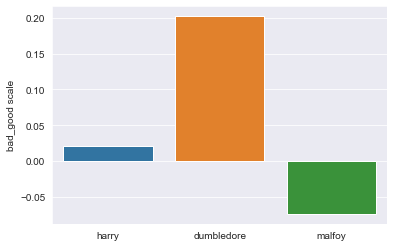

In [760]:
ax = sns.barplot(x=pol_words_sim.index, y=pol_words_sim.cos_sim)
ax.set(ylabel="bad_good scale")
plt.savefig('goodbad.png')
plt.show()
#Harry is located between good and bad, but more good.
#Dumbledore is located towards the good end of the scale. 
#Malfoy is located in the bad end of the scale.

In [762]:
# Checking the vectors semantic relations to compare to the plot above
model.wv.most_similar("harry", topn=15)

[('harryl', 0.7255035042762756),
 ('die.', 0.7223395109176636),
 ('readjusted', 0.7195497751235962),
 ('potters.', 0.7184015512466431),
 ('free.', 0.7155298590660095),
 ('gabbling', 0.7143489122390747),
 ('wormtail.', 0.7134877443313599),
 ('try.', 0.713019847869873),
 ('gits', 0.7106040716171265),
 ('huh', 0.7092150449752808),
 ('apologetic', 0.7091353535652161),
 ('lives.', 0.7051045894622803),
 ('mum.', 0.7021036744117737),
 ('many.', 0.7019387483596802),
 ('hearts', 0.7015182375907898)]

In [763]:
# Checking the vectors semantic relations to compare to the plot above
model.wv.most_similar("dumbledore", topn=10)

[('dumbledore.', 0.6128495335578918),
 ('headmaster', 0.5900408625602722),
 ('dippet', 0.5702698230743408),
 ('yes.', 0.5363028645515442),
 ('flee', 0.5341731905937195),
 ('sardonic', 0.5333683490753174),
 ('casket', 0.5326215028762817),
 ('arranged', 0.5317710638046265),
 ('severus', 0.5302631855010986),
 ('anyone.', 0.530208170413971)]

In [764]:
# Checking the vectors semantic relations to compare to the plot above
model.wv.most_similar("malfoy", topn=10)

[('goyle', 0.6887638568878174),
 ('crabbe', 0.667514443397522),
 ('draco', 0.6277750730514526),
 ('malfoy.', 0.5787255764007568),
 ('pansy', 0.5783221125602722),
 ('cronies', 0.5598978996276855),
 ('parkinson', 0.5482883453369141),
 ('vincent', 0.5463175773620605),
 ('lucius', 0.5449580550193787),
 ('smirking', 0.5441932678222656)]

#### Q4 Interpritation ####
In creating my NLP model, I trained it with ~62,000 words and had success when testing the accuracy. Using Word2Vec’s get_unmatching_word function, I create a list of Slytherin students and one non-Slytherin. The model was able to accurately detect which was not the Slytherin student. Additionally, I used the most_similar function to test the vectors semantic relations for various characters such as Hagrid. I also tested the positive and negative correlations with James Potter, the word ‘Father’ and Snape. With this, the model detected the correlation between the two to be Lily Potter, ‘mother’, ‘parents’ and others. As an avid Harry Potter fan, I can see how the model was correct with those correlations. To asses Harry Dumbeoldore, and Malfoy on a good vs. bad scale, I used the scipy cosine_similarity function to give each character a score. These scores and through the Seaborn scatter plot, we can see that Dumbledor is the ‘goodest’ of the three in which he is more on the good than the bad side of the plot. Following second was Harry Potter falling in both the good and bad sides. Third came Malfoy falling completely on the bad side of the plot. I believe this output is accurate due to the nature of the character's roles. Dumbledor is always a mentor and protector, while Harry Potter is a good person but does mischievous and dangerous tasks. Malfoy is just a villainous character through most of the entire series.

#### References

- Q1: Notebooks
https://stackoverflow.com/questions/51748679/getting-total-word-count-from-a-string-series-in-a-pandas-data-frame

- Q2 
Notebooks
https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
https://stackoverflow.com/questions/40774787/renaming-columns-in-a-pandas-dataframe-with-duplicate-column-names
https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text
https://stackoverflow.com/questions/52626103/custom-colormap

- Q3 
Notebooks
https://textblob.readthedocs.io/en/dev/

- Q4 
Notebooks
https://samyzaf.com/ML/nlp/nlp.html
https://www.youtube.com/watch?v=pY9EwZ02sXU
https://pythonspot.com/tokenizing-words-and-sentences-with-nltk/
https://www.w3schools.com/python/python_regex.asp
https://stackoverflow.com/questions/6773584/how-is-pythons-glob-glob-ordered
https://stackoverflow.com/questions/42407976/loading-multiple-text-files-from-a-folder-into-a-python-list-variable
https://stackoverflow.com/questions/46105180/typeerror-expected-string-or-bytes-like-object-with-python-nltk-word-tokenize




<img src="https://media.giphy.com/media/tfdeUfV3RsVKE/giphy.gif">
                   <p><center> *GIF of Harry Potter proud of my final project :)</center></p>
                   <p><center> Have a good & safe summer!</center></p>
